# Supervised learning- regression- knn and penalisation

## 0. Loading packages and dataset

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

df = pd.read_csv('scores.csv')

C:\Users\Victo\AppData\Local\Temp\ipykernel_18784\2272879871.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


For the first part of this class (nearest neighbors), we will use the scores-dataset again. We will first split the train and test set and standardize both again.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df['hours']
y = df['scores']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_test = np.array(X_test).reshape(-1, 1)
X_train = np.array(X_train).reshape(-1, 1)

scaler = StandardScaler()
X_train_stand = scaler.fit_transform(X_train)
X_test_stand = scaler.transform(X_test)



I just quickly take a look at the standardized plot. (I want to see what my maximum bandwith (or radius) can be).

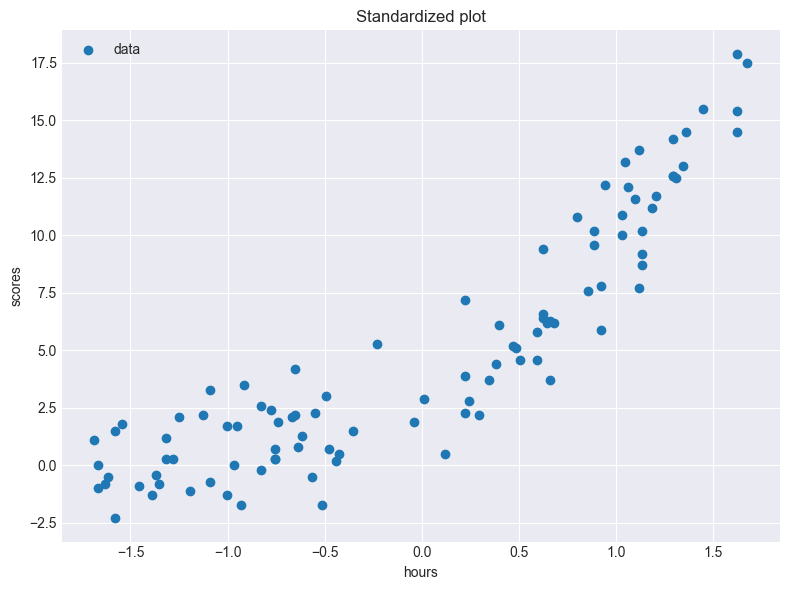

In [3]:
X_stand  = scaler.transform(np.array(X).reshape(-1, 1))

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(X_stand, df.scores, label='data')
plt.axis('tight')
plt.legend()
plt.title("Standardized plot")
ax.set_xlabel("hours");
ax.set_ylabel("scores");
plt.tight_layout()
plt.show()

# 1. Nearest neighbors
## 1.1. Radius Neighbors Regression
We import the right function and test one possible model with a bandwith of 0.1

In [4]:
from sklearn.neighbors import RadiusNeighborsRegressor

Rnn = RadiusNeighborsRegressor(radius=0.1)
Rnn.fit(X_train_stand, y_train)  


RadiusNeighborsRegressor(radius=0.1)

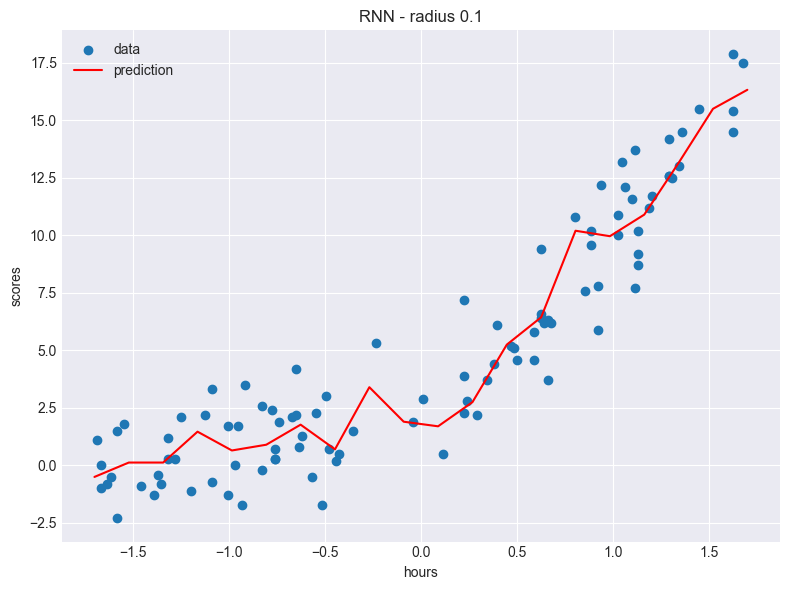

In [5]:
# making predictions for full range of values
range_stand = np.linspace(-1.7,1.7,20)
predictions_plot = [Rnn.predict([[x]]) for x in range_stand]

# plot
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(X_stand, df.scores, label='data')
plt.plot(range_stand, predictions_plot, c='r', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RNN - radius 0.1")
ax.set_xlabel("hours");
ax.set_ylabel("scores");
plt.tight_layout()
plt.show()

We get a very wobbly line. This is a clear indication of an overfitted model. This can also be seen by the fact that the training model has an R^2 of 94%, while the test set only has 82%.

Play around a bit with the value for the radius. When do we have overfitting? When is it underfitted?

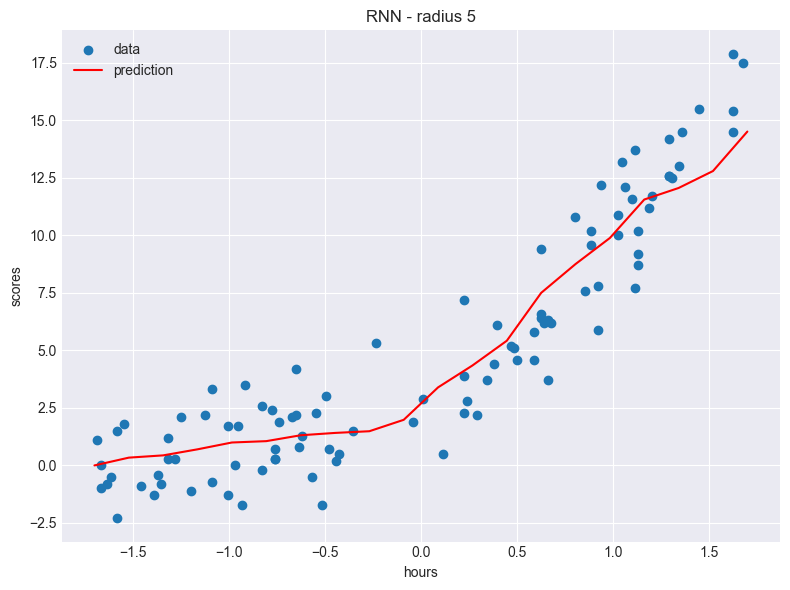

In [6]:
Rnn = RadiusNeighborsRegressor(radius=0.5)
Rnn.fit(X_train_stand, y_train)    

# makin predictions for full range of values
range_stand = np.linspace(-1.7,1.7,20)
predictions_plot = [Rnn.predict([[x]]) for x in range_stand]

# plot
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(X_stand, df.scores, label='data')
plt.plot(range_stand, predictions_plot, c='r', label='prediction')
plt.axis('tight')
plt.legend();
plt.title("RNN - radius 5")
ax.set_xlabel("hours");
ax.set_ylabel("scores");
plt.tight_layout()
plt.show()

A bandwith of 5 clearly leads to underfitting. Our model is so simplified it can only estimate the average anymore. (This is because all points are considered as neighbors with such a wide bandwith, so the average of all points is taken)

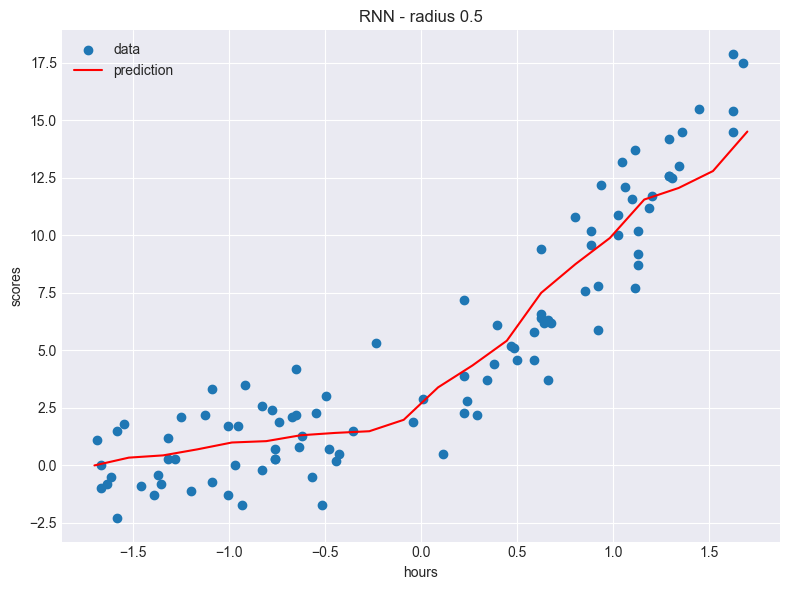

In [7]:
Rnn = RadiusNeighborsRegressor(radius=0.5)
Rnn.fit(X_train_stand, y_train)    

# makin predictions for full range of values
range_stand = np.linspace(-1.7,1.7,20)
predictions_plot = [Rnn.predict([[x]]) for x in range_stand]

# plot
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(X_stand, df.scores, label='data')
plt.plot(range_stand, predictions_plot, c='r', label='prediction')
plt.axis('tight')
plt.legend();
plt.title("RNN - radius 0.5")
ax.set_xlabel("hours");
ax.set_ylabel("scores");
plt.tight_layout()
plt.show()

0.5 looks a lot better. But we can't keep trying different values to see which is best. The bandwith is a hyperparamater, so we can use cross-validation to extract the best value.

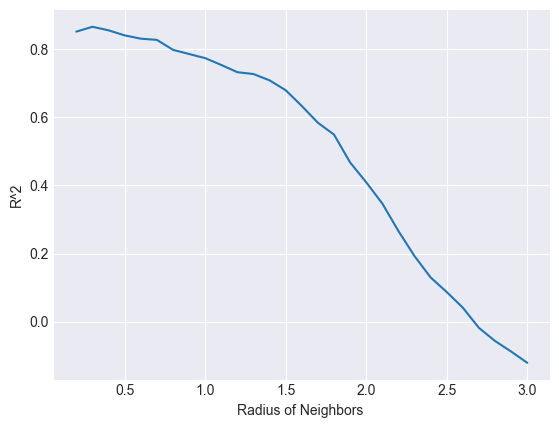

The optimal radius is 0.3
The validated score of the optimal model is 0.8658009413446976


In [8]:
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.model_selection import cross_val_score

Radius = np.linspace(0.2,3,29)  
cv_scores = []
sd_scores = []
# perform 5-fold cross validation on the 11 possible values for the radius (bandwith)
for k in Radius:
    Rnn = RadiusNeighborsRegressor(radius= k)
    scores = cross_val_score(Rnn, X_train_stand, y_train,  cv=5)
    cv_scores.append(scores.mean())
    sd_scores.append(np.sqrt(scores.var())/np.sqrt(5))
 
  
max_value = max(cv_scores)
max_index = cv_scores.index(max_value)

plt.plot(Radius, cv_scores)
plt.xlabel('Radius of Neighbors ')
plt.ylabel('R^2')

plt.show()

print('The optimal radius is '+str(Radius[max_index]))
print('The validated score of the optimal model is '+str(max_value))


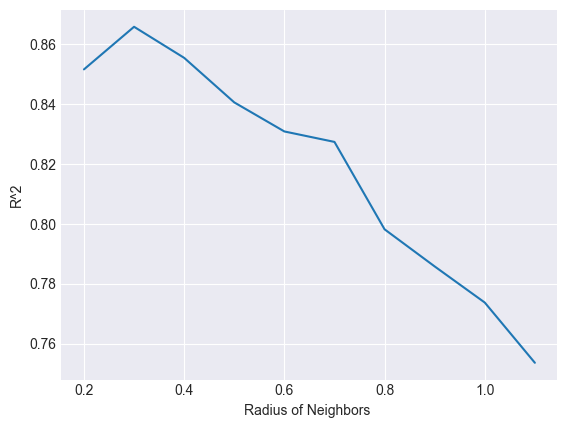

The optimal radius is 0.3
The validated score of the optimal model is 0.8658009413446976


In [9]:
#Let's zoom in on the plot
plt.plot(Radius[0:10], cv_scores[0:10])
plt.xlabel('Radius of Neighbors ')
plt.ylabel('R^2')

plt.show()
print('The optimal radius is '+str(Radius[max_index]))
print('The validated score of the optimal model is '+str(max_value))

0.3 is indeed the most optimal bandwith

## 1.2 K-nearest Neighbors
Let's do the same for knn. 

### 1.2.2 playing around
Use this code to play around with the values for k. What leads to underfitting, what to overfitting?

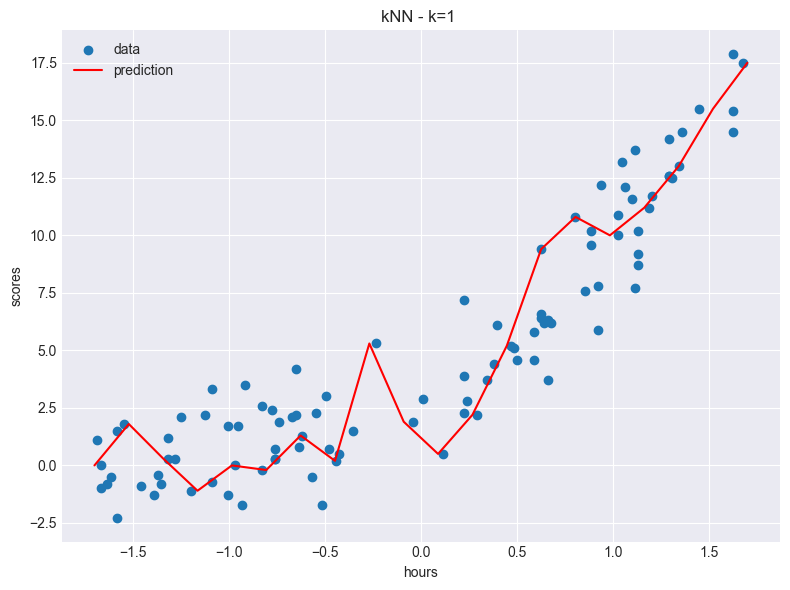

In [10]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train_stand, y_train)    
# makin predictions for full range of values
range_stand = np.linspace(-1.7,1.7,20)
predictions_plot = [knn.predict([[x]]) for x in range_stand]

# plot
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(X_stand, df.scores, label='data')
plt.plot(range_stand, predictions_plot, c='r', label='prediction')
plt.axis('tight')
plt.legend();
plt.title("kNN - k=1 ")
ax.set_xlabel("hours");
ax.set_ylabel("scores");
plt.tight_layout()
plt.show()

A small k lead to overfitting.

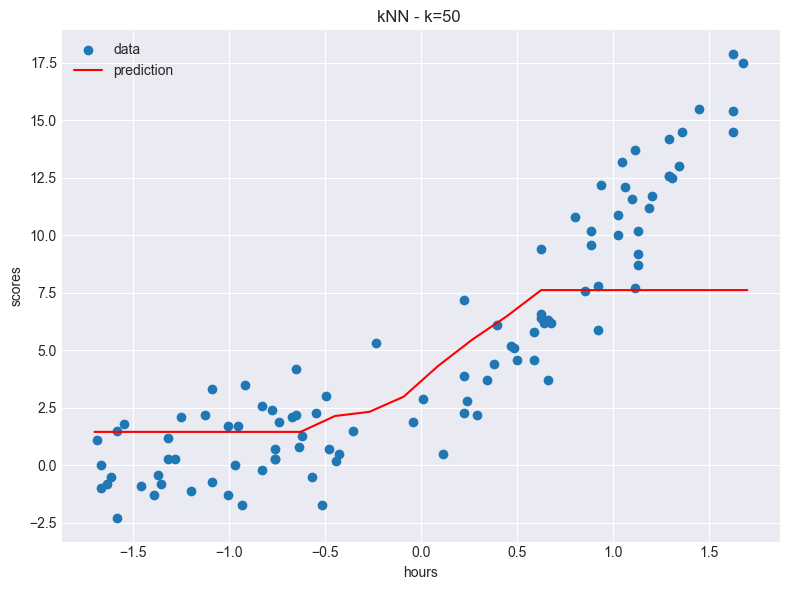

In [11]:
knn = KNeighborsRegressor(n_neighbors=50)
knn.fit(X_train_stand, y_train)    
# makin predictions for full range of values
range_stand = np.linspace(-1.7,1.7,20)
predictions_plot = [knn.predict([[x]]) for x in range_stand]

# plot
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(X_stand, df.scores, label='data')
plt.plot(range_stand, predictions_plot, c='r', label='prediction')
plt.axis('tight')
plt.legend();
plt.title("kNN - k=50 ")
ax.set_xlabel("hours");
ax.set_ylabel("scores");
plt.tight_layout()
plt.show()

This model is underfitted. But did you notice the ends? It starts to level out. What is causing this? It's because there are no more  (or enough) neigbors at the outer ends anymore.

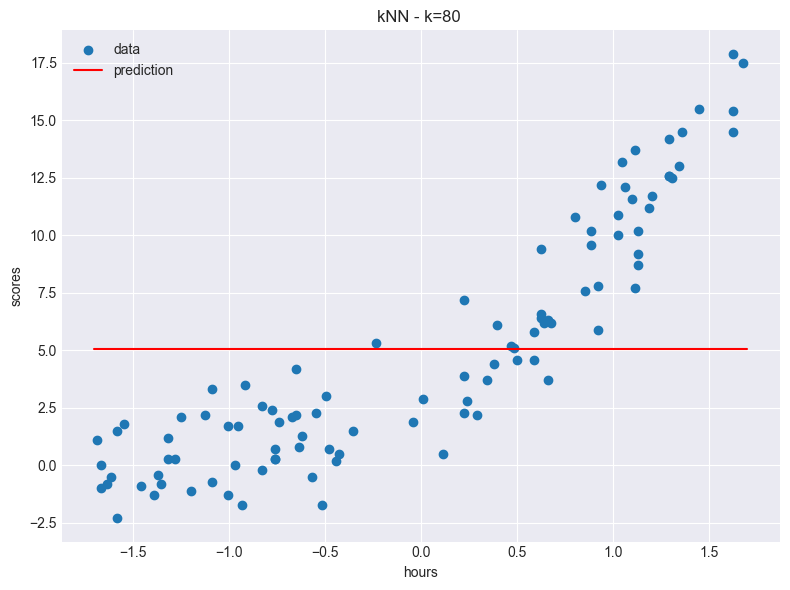

In [12]:
knn = KNeighborsRegressor(n_neighbors=80)
knn.fit(X_train_stand, y_train)    
# makin predictions for full range of values
range_stand = np.linspace(-1.7,1.7,20)
predictions_plot = [knn.predict([[x]]) for x in range_stand]

# plot
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(X_stand, df.scores, label='data')
plt.plot(range_stand, predictions_plot, c='r', label='prediction')
plt.axis('tight')
plt.legend();
plt.title("kNN - k=80 ")
ax.set_xlabel("hours");
ax.set_ylabel("scores");
plt.tight_layout()
plt.show()

A large k  clearly leads to underfitting;

### 1.2.2 cross-validation

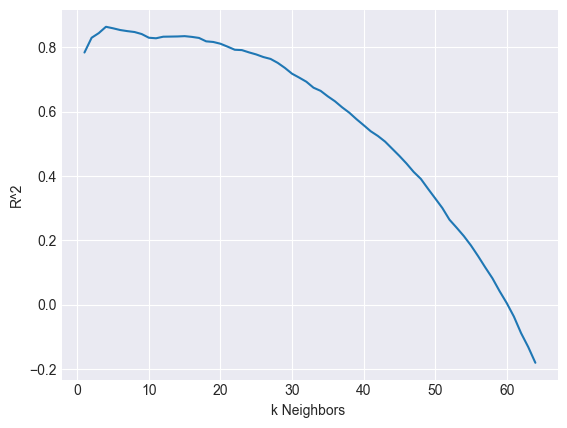

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

K = np.arange(1,65)    # This will give an array of numbers between 1 and 20
cv_scores = []
sd_scores = []
# perform 5-fold cross validation on the  possible values for the amount of neighbors
for k in K:
    knn = KNeighborsRegressor(n_neighbors= k)
    scores = cross_val_score(knn, X_train_stand, y_train,  cv=5)
    cv_scores.append(scores.mean())
    sd_scores.append(np.sqrt(scores.var())/np.sqrt(5))
 
max_value = max(cv_scores)
max_index = cv_scores.index(max_value)

plt.plot(K, cv_scores)
plt.xlabel('k Neighbors ')
plt.ylabel('R^2')

plt.show()


This plot is hard to read, so lets focus on the first 30 values, because using more than 30 neighbors clearly leads to underfitting

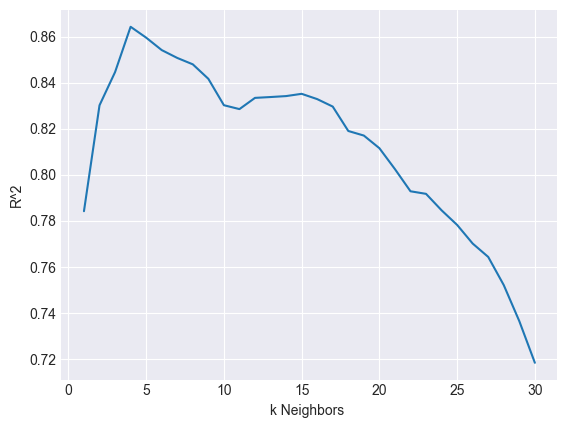

The best k is 4
The best validated score is 0.8642863340254449


In [14]:

plt.plot(K[0:30],cv_scores[0:30])
plt.xlabel('k Neighbors ')
plt.ylabel('R^2')
plt.show()
print('The best k is', K[max_index])
print('The best validated score is', max_value)

Let's compare this to the score on the training set, just to see if the model is overfitted or not (not necesarry to do this)

In [15]:
knn = KNeighborsRegressor(n_neighbors= 5)
knn.fit(X_train_stand, y_train)
knn.score(X_train_stand, y_train)

0.9300229582848785

The training score is a bit higher, their is a little bit of overfit, but not too much.

# 2. Curse of dimensionality

## 2.1 Introduction

In [16]:
from scipy.spatial.distance import cdist

We first create a function that generates random data points in a certain amount of dimensions. The data consists of two classes. Feel free to expand the function for more than 2 classes.

In [17]:
def generate_data(samples,dims):
    class_1_data = np.random.normal(0,1,(samples, dims)) #normal distributed with mean = 0 and std = 1
    class_2_data = np.random.normal(3,1,(samples, dims)) #normal distributed with mean = 3 and std 1
    data = np.concatenate([class_1_data, class_2_data], axis=0)
    data = (data - data.mean(axis=0)) / data.std(axis=0) # z-score (standardizing)
    return data, cdist(data, data, metric='euclidean').flatten()

Next we start with one dimensional data

[[-1.52917144]
 [-0.41394231]
 [ 0.08332308]
 [-1.02172622]
 [-0.5369411 ]]


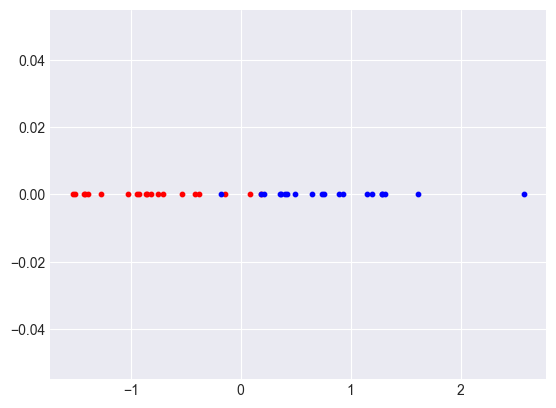

C:\Users\Victo\AppData\Local\Temp\ipykernel_18784\1437872882.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distances, hist=True, kde=True, color='b')


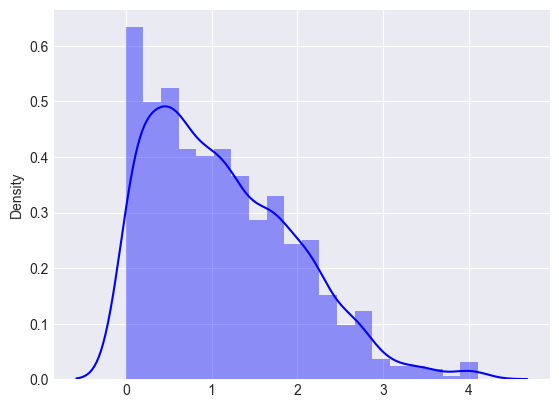

In [18]:
samples = 20
data, distances = generate_data(samples, 1)
print(data[:5])
plt.scatter(data[:samples], [0]*samples, s=10, color='r')
plt.scatter(data[samples:], [0]*samples, s=10, color='b')
plt.show()
sns.distplot(distances, hist=True, kde=True, color='b')
plt.show()

==> There are a lot of distances that are very small, in general kNN works well in this kind of settings

In the second step we try to do the experiment for two dimensional data

[[-1.22004348 -0.60833963]
 [-1.19315709 -0.30722376]
 [-0.47007131 -0.32438858]
 [-1.06067785 -1.46084841]
 [-1.11028833 -1.39022585]]


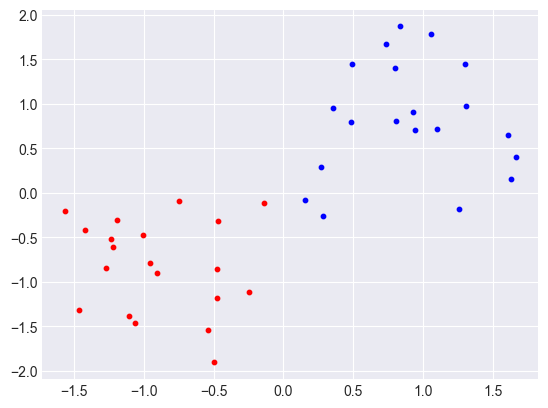

C:\Users\Victo\AppData\Local\Temp\ipykernel_18784\2725380386.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distances, hist=True, kde=True, color='b')


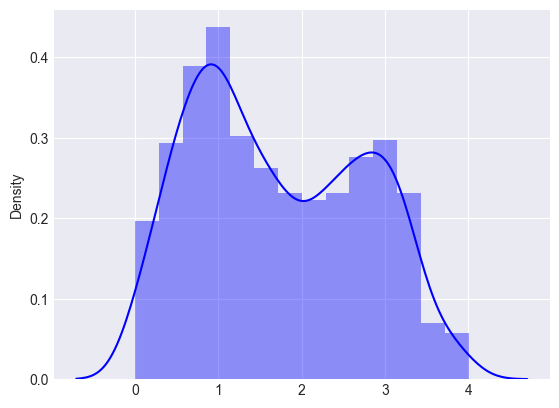

In [19]:
data, distances = generate_data(samples, 2)
print(data[:5])
plt.scatter(data[:samples,0], data[:samples,1], s=10, color='r')
plt.scatter(data[samples:,0], data[samples:,1], s=10, color='b')
plt.show()
sns.distplot(distances, hist=True, kde=True, color='b')
plt.show()

==> here there are also a lot of distances that are quite small and there are clusters of data points, so kNN works well

But then, where occurs the "curse of dimensionality"? ==> in HIGHER dimensions

C:\Users\Victo\AppData\Local\Temp\ipykernel_18784\988965949.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distances, hist=True, kde=True, color='b')


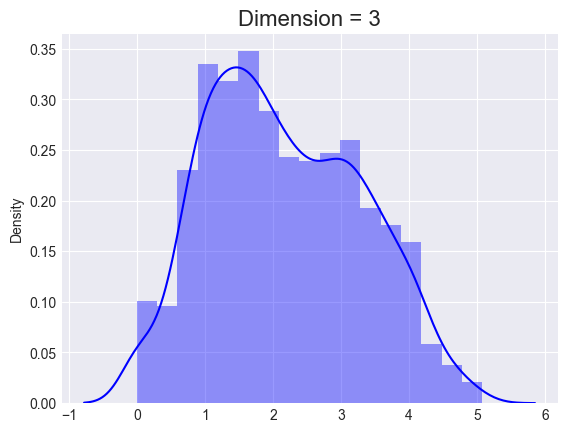

C:\Users\Victo\AppData\Local\Temp\ipykernel_18784\988965949.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distances, hist=True, kde=True, color='b')


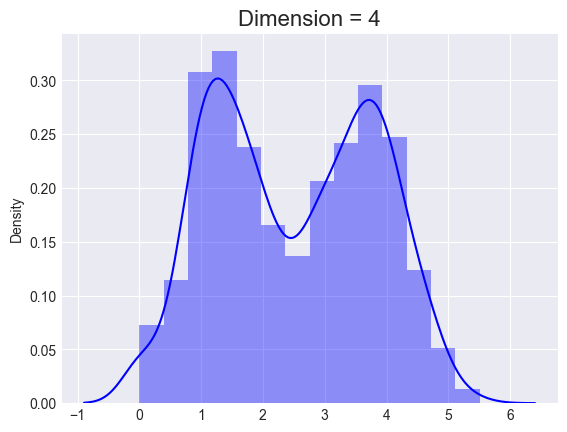

C:\Users\Victo\AppData\Local\Temp\ipykernel_18784\988965949.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distances, hist=True, kde=True, color='b')


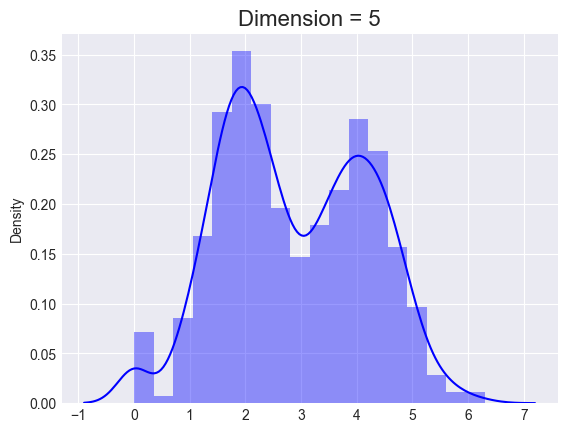

C:\Users\Victo\AppData\Local\Temp\ipykernel_18784\988965949.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distances, hist=True, kde=True, color='b')


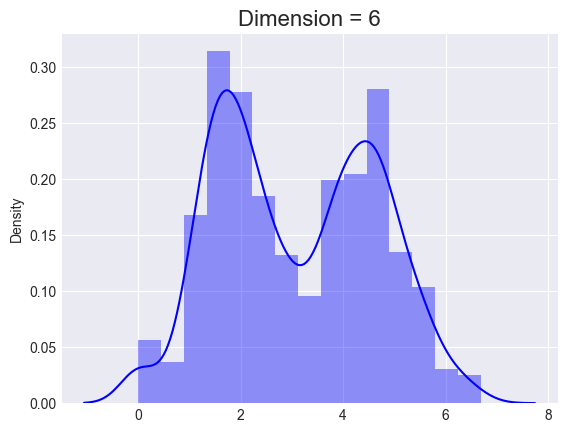

C:\Users\Victo\AppData\Local\Temp\ipykernel_18784\988965949.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distances, hist=True, kde=True, color='b')


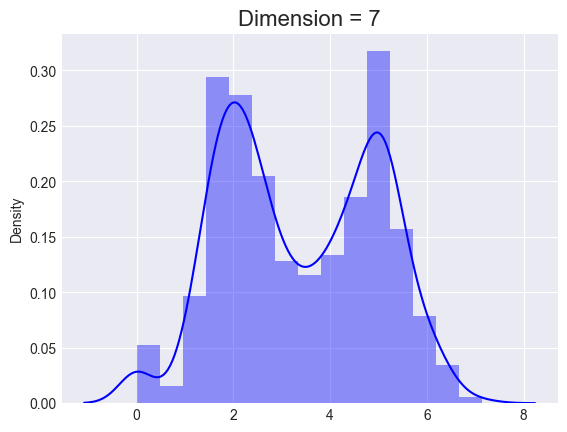

C:\Users\Victo\AppData\Local\Temp\ipykernel_18784\988965949.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distances, hist=True, kde=True, color='b')


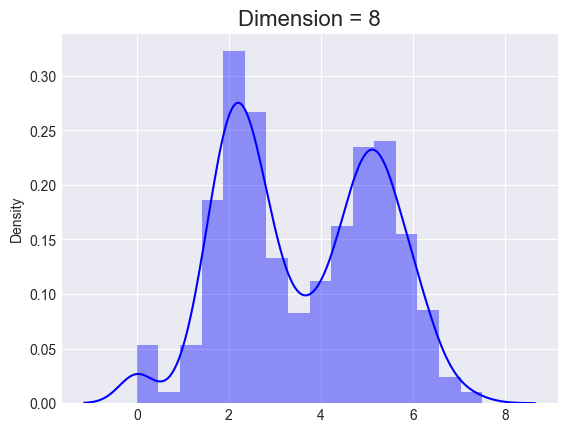

C:\Users\Victo\AppData\Local\Temp\ipykernel_18784\988965949.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distances, hist=True, kde=True, color='b')


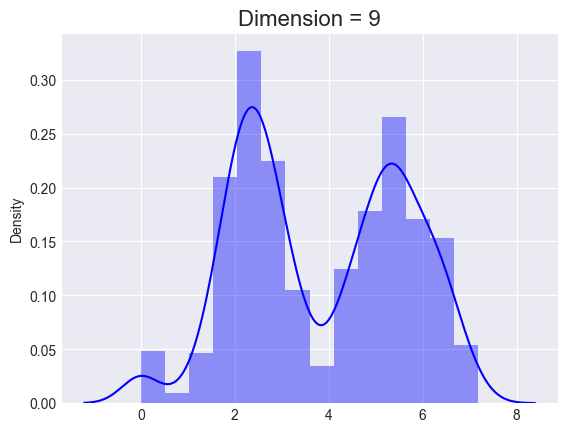

C:\Users\Victo\AppData\Local\Temp\ipykernel_18784\988965949.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distances, hist=True, kde=True, color='b')


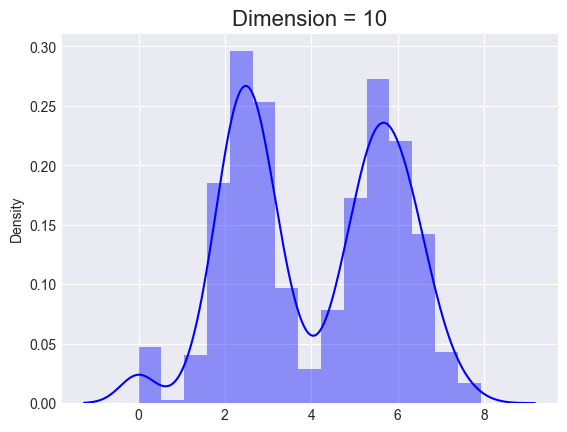

C:\Users\Victo\AppData\Local\Temp\ipykernel_18784\988965949.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distances, hist=True, kde=True, color='b')


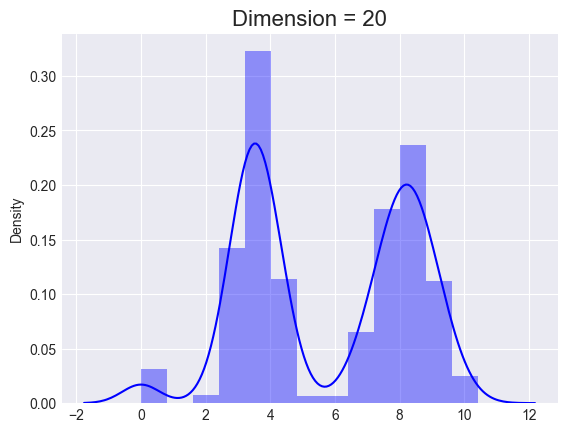

C:\Users\Victo\AppData\Local\Temp\ipykernel_18784\988965949.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distances, hist=True, kde=True, color='b')


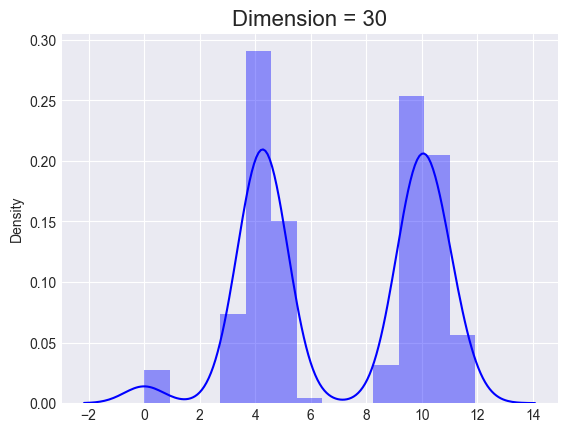

C:\Users\Victo\AppData\Local\Temp\ipykernel_18784\988965949.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distances, hist=True, kde=True, color='b')


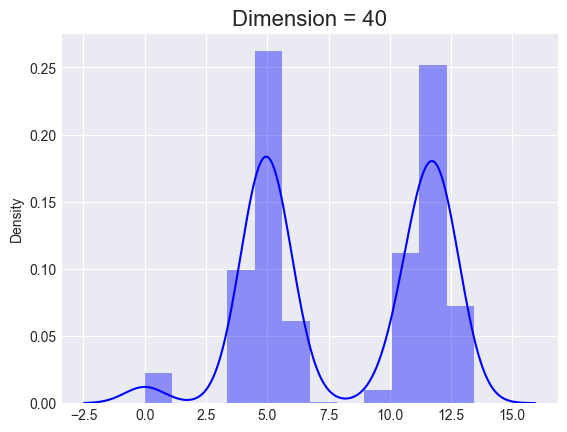

C:\Users\Victo\AppData\Local\Temp\ipykernel_18784\988965949.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distances, hist=True, kde=True, color='b')


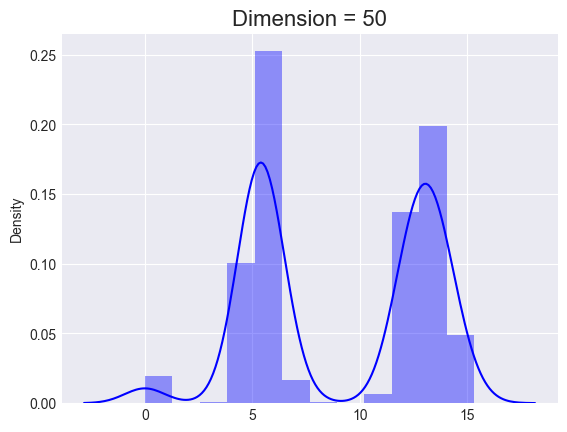

C:\Users\Victo\AppData\Local\Temp\ipykernel_18784\988965949.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distances, hist=True, kde=True, color='b')


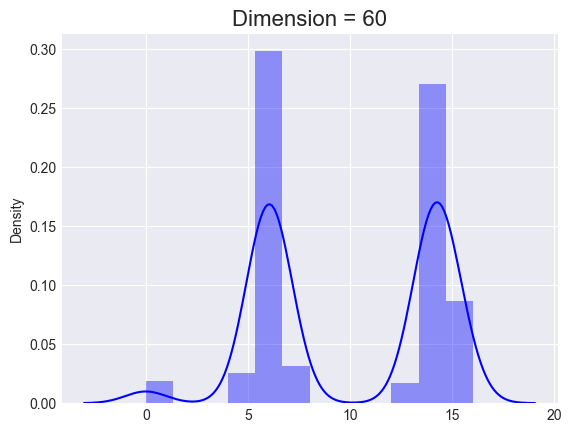

C:\Users\Victo\AppData\Local\Temp\ipykernel_18784\988965949.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distances, hist=True, kde=True, color='b')


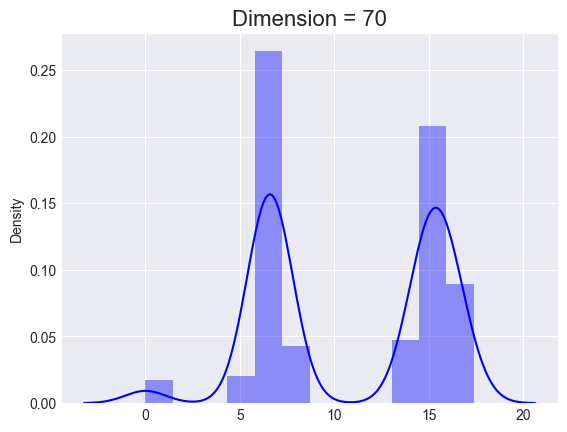

C:\Users\Victo\AppData\Local\Temp\ipykernel_18784\988965949.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distances, hist=True, kde=True, color='b')


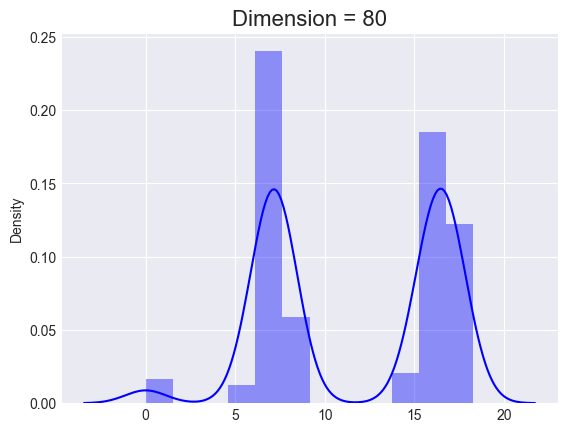

C:\Users\Victo\AppData\Local\Temp\ipykernel_18784\988965949.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distances, hist=True, kde=True, color='b')


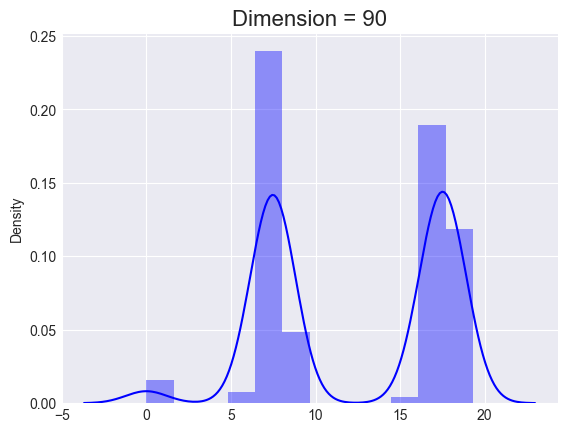

C:\Users\Victo\AppData\Local\Temp\ipykernel_18784\988965949.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distances, hist=True, kde=True, color='b')


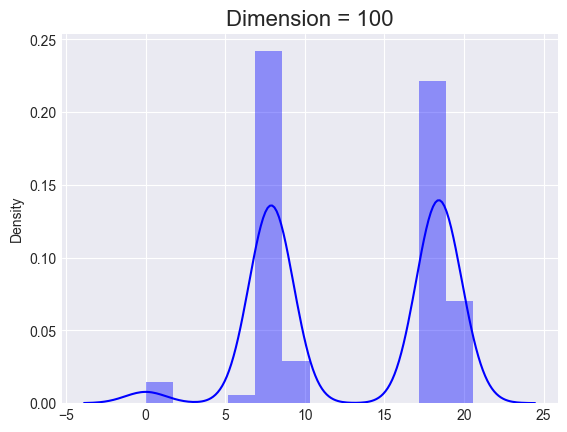

C:\Users\Victo\AppData\Local\Temp\ipykernel_18784\988965949.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distances, hist=True, kde=True, color='b')


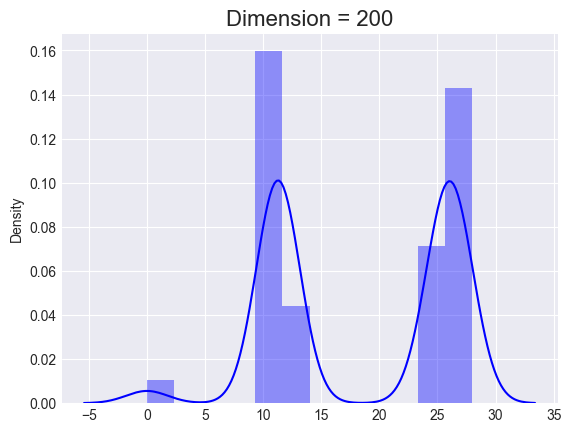

C:\Users\Victo\AppData\Local\Temp\ipykernel_18784\988965949.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distances, hist=True, kde=True, color='b')


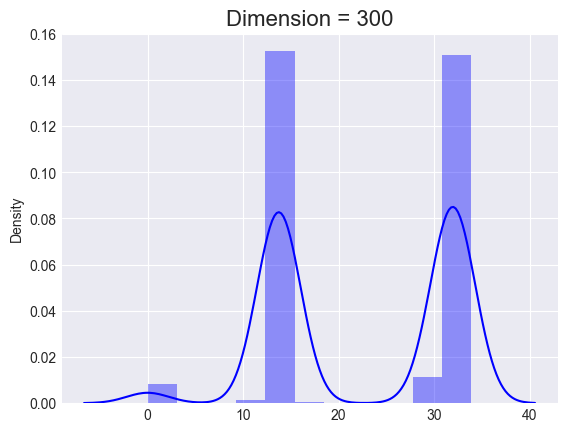

C:\Users\Victo\AppData\Local\Temp\ipykernel_18784\988965949.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distances, hist=True, kde=True, color='b')


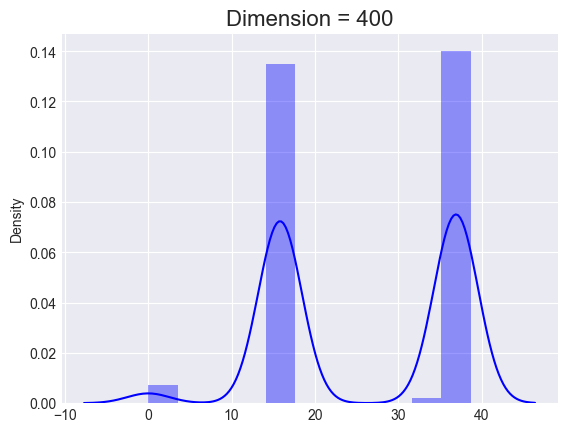

C:\Users\Victo\AppData\Local\Temp\ipykernel_18784\988965949.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distances, hist=True, kde=True, color='b')


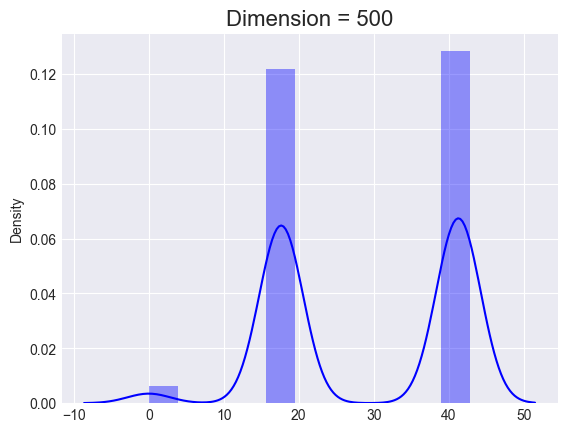

In [20]:
for dim in list(range(3,10)) + list(range(10,110,10)) + [100*i for i in range(2,6)]:
        _, distances = generate_data(samples, dim)
        sns.distplot(distances, hist=True, kde=True, color='b')
        plt.title('Dimension = %s'%dim, fontsize=16)
        plt.show()

From the 10 dimensional data on, we notice there are two peaks occuring, and even a smaller bar at very small distance (0)

## 2.2 Sample perspective
Another perspective --> look at the number of samples needed <br/>
Assume we want 10 samples per unique combination of variables. 
<li>1 binary variable --> 2 unique combinations --> 20 samples needed</li>
<li>2 binary variables --> 4 unique combinations --> 40 samples needed</li>
<li>$k$ binary variable --> $2^k$ unique combinations --> $10*2^k$ samples needed</li>

In [21]:
k_values = np.arange(1,21)
samples_needed = 10*2**k_values

Text(1, 9000000.0, '10 Million')

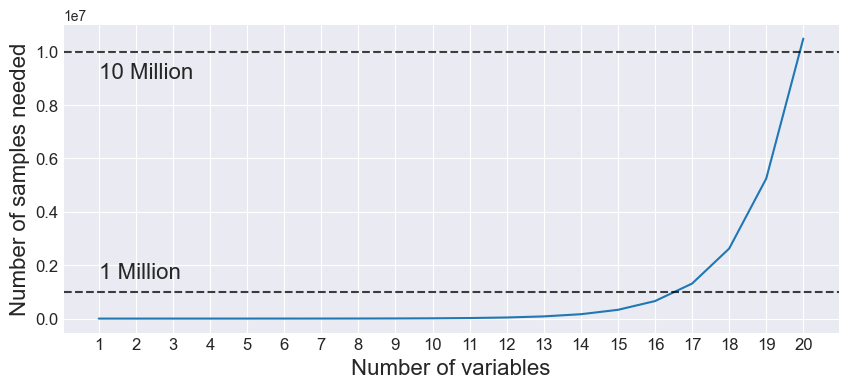

In [22]:
plt.figure(figsize=(10,4))
plt.plot(k_values, samples_needed)
plt.xlabel('Number of variables', fontsize=16)
plt.ylabel('Number of samples needed', fontsize=16)
plt.xticks(k_values, fontsize=12)
plt.yticks(np.arange(0,1.2*10**7, .2*10**7), fontsize=12)
plt.axhline(10**6, linestyle='--', color='k', alpha=0.75)
plt.annotate('1 Million', (1,.15*10**7), fontsize=16)
plt.axhline(10**7, linestyle='--', color='k', alpha=0.75)
plt.annotate('10 Million', (1,.9*10**7), fontsize=16)

# 3. Penalisation

With more features, penalisation can be used. We will use a new dataset, called 'insurance_cleaned'. 
It tries to predict medical costs (charges) based on the following predictors:
+ Age 
+ Sex 
+ Number of children
+ Smoker
+ Region
+ BMI

The dataset is already cleaned, but not standardized yet. Our outcome is 'charges'.

In [23]:
#df = pd.read_csv('real_estate_cleaned.csv')
df = pd.read_csv('insurance_cleaned.csv')

First, we take a quick look at the data. The outcome has been log-transformed.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   int64  
 5   sex_male          1338 non-null   int64  
 6   smoker_no         1338 non-null   int64  
 7   smoker_yes        1338 non-null   int64  
 8   region_northeast  1338 non-null   int64  
 9   region_northwest  1338 non-null   int64  
 10  region_southeast  1338 non-null   int64  
 11  region_southwest  1338 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 125.6 KB


In [25]:
df.describe()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,9.098828,0.494768,0.505232,0.795217,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,0.919379,0.500160,0.500160,0.403694,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,7.023647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,8.464064,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9.146658,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,9.719618,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,11.063061,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734236,1,0,0,1,0,0,0,1
1,18,33.770,1,7.453882,0,1,1,0,0,0,1,0
2,28,33.000,3,8.400763,0,1,1,0,0,0,1,0
3,33,22.705,0,9.998137,0,1,1,0,0,1,0,0
4,32,28.880,0,8.260455,0,1,1,0,0,1,0,0


array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'bmi'}>,
        <AxesSubplot: title={'center': 'children'}>],
       [<AxesSubplot: title={'center': 'charges'}>,
        <AxesSubplot: title={'center': 'sex_female'}>,
        <AxesSubplot: title={'center': 'sex_male'}>],
       [<AxesSubplot: title={'center': 'smoker_no'}>,
        <AxesSubplot: title={'center': 'smoker_yes'}>,
        <AxesSubplot: title={'center': 'region_northeast'}>],
       [<AxesSubplot: title={'center': 'region_northwest'}>,
        <AxesSubplot: title={'center': 'region_southeast'}>,
        <AxesSubplot: title={'center': 'region_southwest'}>]],
      dtype=object)

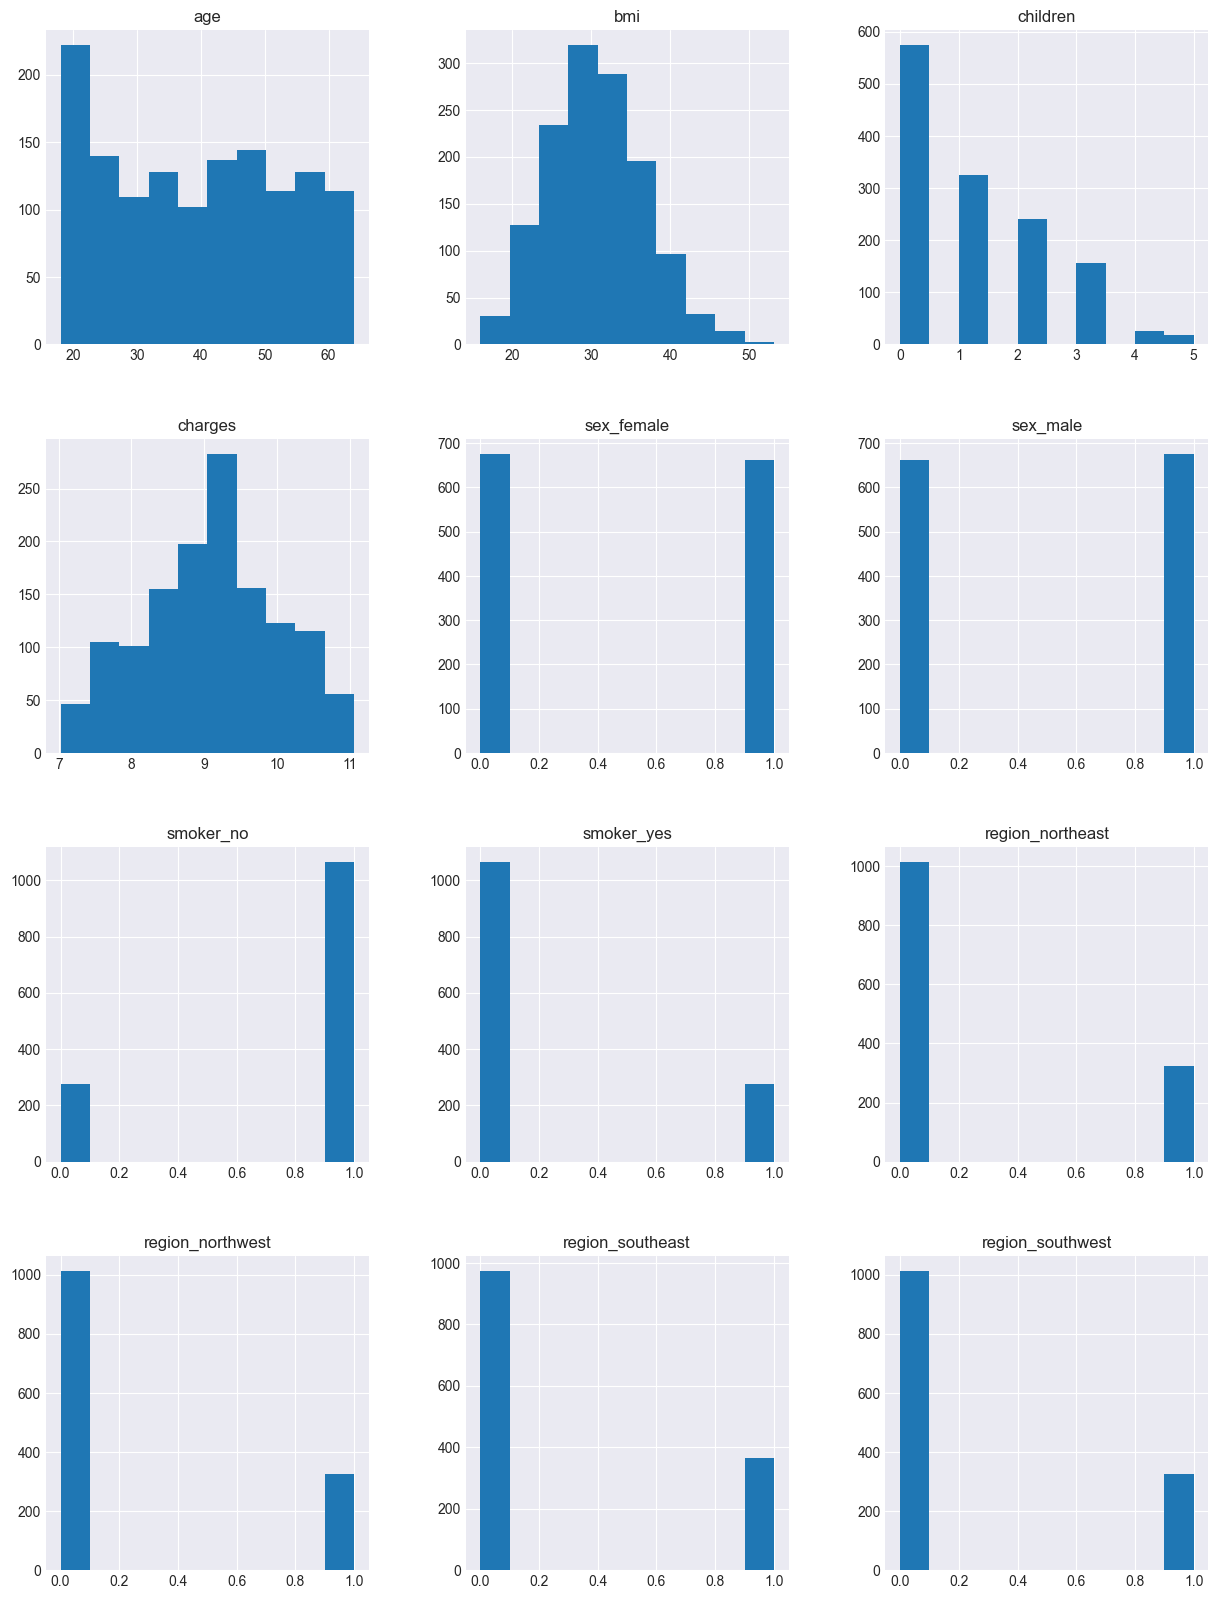

In [27]:
df.hist(figsize=(15,20))

## 2.1. Train/test-split

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from random import Random

df_shuffle = df.sample(frac=1, random_state=40)

X = df_shuffle.drop(['charges'],1)
y = df_shuffle['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

numerical = ['age','bmi','children']
#do not forget to standardize!!
scaler = StandardScaler()
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()
X_train_stand[num] = scaler.fit_transform(X_train[num])
X_test_stand[num] = scaler.transform(X_test[num])

C:\Users\Victo\AppData\Local\Temp\ipykernel_18784\1501096751.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_shuffle.drop(['charges'],1)


## 2.2 Polynomials

In [29]:
from sklearn.preprocessing import PolynomialFeatures

# First design the features
# PolynomialFeatures generates a new feature matrix consisting 
# of all polynomial combinations of the features less than or equal to the specified degree
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train_stand)
X_test_poly = poly.transform(X_test_stand)
X_train_poly.shape

(1070, 4368)

In [30]:
X_test_poly

array([[ 1.        , -0.51343351, -0.0904027 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.20090435,  1.59244349, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        ,  0.91518138,  1.00254609, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.        ,  0.34373542, -1.08175804, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -1.51346393,  1.26144551, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -1.51346393,  1.26144551, ...,  0.        ,
         0.        ,  0.        ]])

This gives you all features up to the third degree + all possible interactions between these terms. This results in 4368 features. While we only have 1070 observations. This will lead to problems, namely to overfitting

In [31]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=False)
reg.fit(X_train_poly, y_train)
print(reg.score(X_train_poly, y_train))
print(reg.score(X_test_poly, y_test))

0.8999109135340355
0.22982088624420327


Indeed, the model is severely overfitted when $p>n$. Lets try using penalisation, with the default penalisation (default value $\alpha$= 1). We will do lasso-regression on the loss function $J(\theta)$ <br/>
$$\alpha * \sum_{j=1}^{p}\ |\beta_j|$$

In [32]:
from sklearn import linear_model
linreg_lasso1 = linear_model.Lasso()
linreg_lasso1.fit(X_train_poly, y_train)
print('R2: %.3f' % linreg_lasso1.score(X_train_poly, y_train))
print('R2: %.3f' % linreg_lasso1.score(X_test_poly, y_test))

R2: 0.137
R2: 0.125


The R2 on the training data is now very low! This looks like the model is underfitted. We take a look at the coefficients.

In [33]:
linreg_lasso1.coef_

array([ 0.,  0.,  0., ...,  0.,  0., -0.])

All coefficients are shrunken down to 0. Offcourse our model is underfitted. What should we do with alpha to fix this? Reduce or increase?

In [34]:
from sklearn import linear_model
linreg_lasso1 = linear_model.Lasso(0.1)
linreg_lasso1.fit(X_train_poly, y_train)
print('R2: %.3f' % linreg_lasso1.score(X_train_poly, y_train))
print('R2: %.3f' % linreg_lasso1.score(X_test_poly, y_test))

R2: 0.693
R2: 0.643


We want our model to be more complex, so we should reduce the penalty. If we put it at 0.1, the R2 improves a lot, but it is not optimal yet. We will perform a cross-validation to look for the best value for alpha. 

In [35]:
from sklearn.model_selection import cross_val_score

Alpha = np.logspace(-3,0)
print(Alpha)
cv_scores = []
sd_scores = []
# perform 5-fold cross validation on the  possible values for the radius (bandwith)
for a in Alpha:
    lasso = linear_model.Lasso(a, max_iter=3000)
    scores = cross_val_score(lasso, X_train_poly, y_train,  cv=5)
    cv_scores.append(scores.mean())
    sd_scores.append(np.sqrt(scores.var())/np.sqrt(5))
 
max_value = max(cv_scores)
max_index = cv_scores.index(max_value)

train = linear_model.Lasso(Alpha[max_index], max_iter=3000)
train.fit(X_train_poly,y_train)

# This generates a lot of warnings, we can choose to ignore warnings: 
#import warnings
#warnings.filterwarnings('ignore')

# or 

# change default Lasso to linear_model.Lasso(a, max_iter=3000, normalize=True, tol=1e-2)


[0.001      0.0011514  0.00132571 0.00152642 0.00175751 0.00202359
 0.00232995 0.0026827  0.00308884 0.00355648 0.00409492 0.00471487
 0.00542868 0.00625055 0.00719686 0.00828643 0.00954095 0.01098541
 0.01264855 0.01456348 0.01676833 0.01930698 0.02222996 0.02559548
 0.02947052 0.03393222 0.0390694  0.04498433 0.05179475 0.05963623
 0.06866488 0.07906043 0.09102982 0.10481131 0.12067926 0.13894955
 0.15998587 0.184207   0.21209509 0.24420531 0.28117687 0.32374575
 0.37275937 0.42919343 0.49417134 0.5689866  0.65512856 0.75431201
 0.86851137 1.        ]


c:\Users\Victo\.virtualenvs\les3_demo_labo-PyPN2T8E\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.077e-01, tolerance: 7.201e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Victo\.virtualenvs\les3_demo_labo-PyPN2T8E\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.819e+00, tolerance: 7.203e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Victo\.virtualenvs\les3_demo_labo-PyPN2T8E\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

Lasso(alpha=0.009540954763499945, max_iter=3000)

What exactly is the "duality gap" that's being thrown as a warning? The duality gap is the difference between a solution of the initial problem and a solution of the dual problem. This dual gap is always positive. Because the lasso problem is convex, there is strong duality. Reducing the dual gap tells us we are getting closer to an optimal solution. 

In order for the algorithm to converge, there has to be an update of a weight coordinate lower than tol (tolerance). Then sklearn will check the dual gap and it will stop if the value is lower than tol. 

The optimal alpha is 0.009540954763499945
The training score of the optimal alpha is 0.857413847522595
The validation score of the optimal alpha is 0.8317486533280386


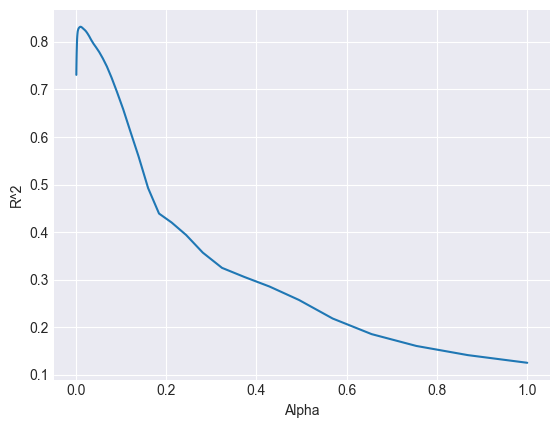

In [36]:
plt.plot(Alpha, cv_scores)
plt.xlabel('Alpha')
plt.ylabel('R^2')

print('The optimal alpha is', Alpha[max_index])
print('The training score of the optimal alpha is', train.score(X_train_poly,y_train))
print('The validation score of the optimal alpha is', max_value)

plt.show()


To finish we'll experiment with Ridge regression (or also called Tikhonov regularization). <br/>
To the loss function $J(\theta)$ we add a penalisation term: 
$$\alpha * \sum_{j=1}^{p}\ \beta_j^{2}$$

In [37]:
linreg_ridge1 = linear_model.Ridge()
linreg_ridge1.fit(X_train_poly, y_train)
print('R2: %.3f' % linreg_ridge1.score(X_train_poly, y_train))
print('R2: %.3f' % linreg_ridge1.score(X_test_poly, y_test))

R2: 0.900
R2: 0.457


In [38]:
linreg_ridge1.coef_

array([0.        , 0.0395907 , 0.03946289, ..., 0.        , 0.        ,
       0.00499795])

In [39]:
linreg_ridge2 = linear_model.Ridge(0.01)
linreg_ridge2.fit(X_train_poly, y_train)
print('R2: %.3f' % linreg_ridge2.score(X_train_poly, y_train))
print('R2: %.3f' % linreg_ridge2.score(X_test_poly, y_test))

R2: 0.900
R2: 0.236


In [40]:
Alpha = np.logspace(-3,0)  
cv_scores = []
sd_scores = []
# perform 5-fold cross validation on the  possible values for the radius (bandwith)
for a in Alpha:
    ridge = linear_model.Ridge(a, max_iter=3000)
    scores = cross_val_score(ridge, X_train_poly, y_train,  cv=5)
    cv_scores.append(scores.mean())
    sd_scores.append(np.sqrt(scores.var())/np.sqrt(5))
 
max_value = max(cv_scores)
max_index = cv_scores.index(max_value)

train = linear_model.Ridge(Alpha[max_index], max_iter=3000)
train.fit(X_train_poly,y_train)

Ridge(alpha=0.15998587196060574, max_iter=3000)

The optimal alpha is 0.15998587196060574
The training score of the optimal alpha is 0.8998770638100207
The validation score of the optimal alpha is -0.02763495700944645


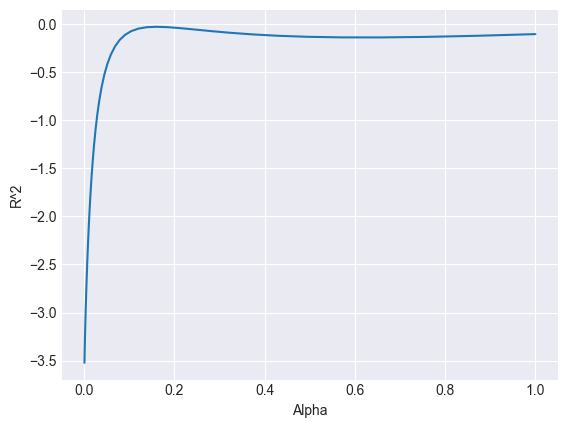

In [41]:
plt.plot(Alpha, cv_scores)
plt.xlabel('Alpha')
plt.ylabel('R^2')

print('The optimal alpha is', Alpha[max_index])
print('The training score of the optimal alpha is', train.score(X_train_poly,y_train))
print('The validation score of the optimal alpha is', max_value)

plt.show()

The R2 validation score is negative, so worse than the mean fit!!

Next class, we will see if we can improve this by using tree-based methods.